In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm

from rl.simulation_utils import simulate_normal_correlated_data

%matplotlib inline

# Simulation of normally distributed data, correlated data

We aim to test the correlation between a physiological measure and the learning rate parameter in the reinforcement learning task. Here, we simulate such correlated data.

In [4]:
np.random.seed(1)

N = 50      # Number of participants
mu_a = 0    # Mean of physiological measure
mu_b = 0.32  # Mean of learning rate (from Lefebvre et al., 2017, NHB)
sig_a = 1   # SD of physiological measure
sig_b = 0.05 * np.sqrt(50)  # SD of learning rate (from Lefebvre et al., 2017, NHB)
r = 0.3

data = simulate_normal_correlated_data(N=N, r=r,
                                       mu_a=mu_a, mu_b=mu_b,
                                       sig_a=sig_a, sig_b=sig_b,
                                       lim_b=(0, 1),
                                       verbose=True)
df = pd.DataFrame(data, columns=['Physiological 1', r'$\alpha_{win}$'])

Pearson r = 0.31, p = 0.0300
  (It took 4 tries to achieve the desired tolerance.)


# Visualization

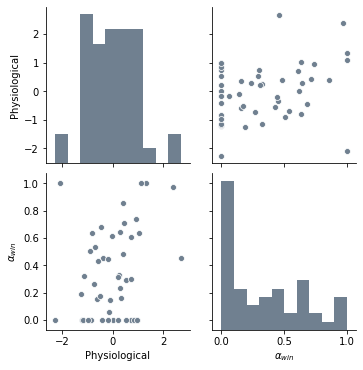

In [5]:
sns.set_palette(sns.color_palette(["slategray", "darksalmon"]))
sns.pairplot(df)
plt.show()

# Linear regression model

In [6]:
exog = sm.add_constant(df['Physiological'])
endog = df[r'$\alpha_{win}$']

# Fit and summarize OLS model
model = sm.OLS(endog, exog)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         $\alpha_{win}$   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     5.004
Date:                Tue, 15 Sep 2020   Prob (F-statistic):             0.0300
Time:                        19:34:21   Log-Likelihood:                -11.644
No. Observations:                  50   AIC:                             27.29
Df Residuals:                      48   BIC:                             31.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3305      0.044      7.492